### Importing libraries & functions

In [71]:
import os, sys
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from utils.others_tb import give_json, filter_countries


import chart_studio.plotly as py 
import cufflinks as cf  
import seaborn as sns
import plotly
import plotly.io as pio
import plotly.express as px
import plotly.graph_objects as go
from plotly.graph_objs import Scatter, Box
import matplotlib.pyplot as plt
import psutil
import kaleido

### Going to the group_EDA folder

In [2]:
def get_root_path(N):
    """
    This function gets the root path of a directory to make it reusable for every computer.
    N represents the amount of iterations needed to get the relative path
    """
    path = os.getcwd()
    for i in range(N):
        path = os.getcwd()
        path = os.path.dirname(path)
    sys.path.append(path)

get_root_path(N=4)


### Getting classes from visualization file

In [3]:
from src.utils.visualization_tb import Plotly_Plot

### Collecting the data

In [4]:
url = 'https://covid.ourworldindata.org/data/owid-covid-data.csv'
df = pd.read_csv(url)

### Cleaning the data

In [5]:
# Change the date column to datetime format
df['date'] = pd.to_datetime(df['date'])
# Dropping columns that are entirely composed of NANs
df = df.dropna(axis=1, how='all')

### Group C constraints

In [6]:
countries = ['Spain', 'Iran', 'Mexico', 'Brazil', 'Netherlands']
col = 'total_cases'

### Filtering the Dataframe to group C's countries

In [7]:
# Relevant columns
relevant = ['date', 'total_cases', 'new_cases', 'new_cases_smoothed', 'total_deaths', 'new_deaths', 'reproduction_rate', 'icu_patients', 'hosp_patients', 'weekly_icu_admissions', 'weekly_hosp_admissions', 'total_tests', 'new_tests', 'positive_rate', 'tests_per_case', 'tests_units', 'total_vaccinations', 'new_vaccinations', 'stringency_index', 'population', 'median_age']
# All 5 countries in a separate dataframe using only the columns relevant for correlations
df_c = filter_countries(df, countries)
# Spain
df_esp = filter_countries(df, ['Spain'])[relevant]
# # Iran
df_irn = filter_countries(df, ['Iran'])[relevant]
# # Netherlands
df_nth = filter_countries(df, ['Netherlands'])[relevant]
# # Mexico
df_mex = filter_countries(df, ['Mexico'])[relevant]
# # Brazil
df_bra = filter_countries(df, ['Brazil'])[relevant]

### Obtaining json file from group C constraints

In [8]:
the_json = give_json(df=df, countries=countries, column_of_interest=col)

## Some visualization

In [9]:
# Plot our json


# plt.plot(pd.read_json(the_json))
# plt.title('Average total cases per day of Group C\'s 5 countries')

In [10]:
# DataFrame of the top correlations in order


# corr = df.corr() 
# c1 = pd.DataFrame(corr.abs().unstack().sort_values(ascending = False).dropna().drop_duplicates())
# c1 = c1.rename(columns={0: 'Correlation'})
# c1[(c1['Correlation'] > 0.9) & (c1['Correlation'] < 1)][:]

Text(0.5, 1.0, 'Spain Positive Correlations')

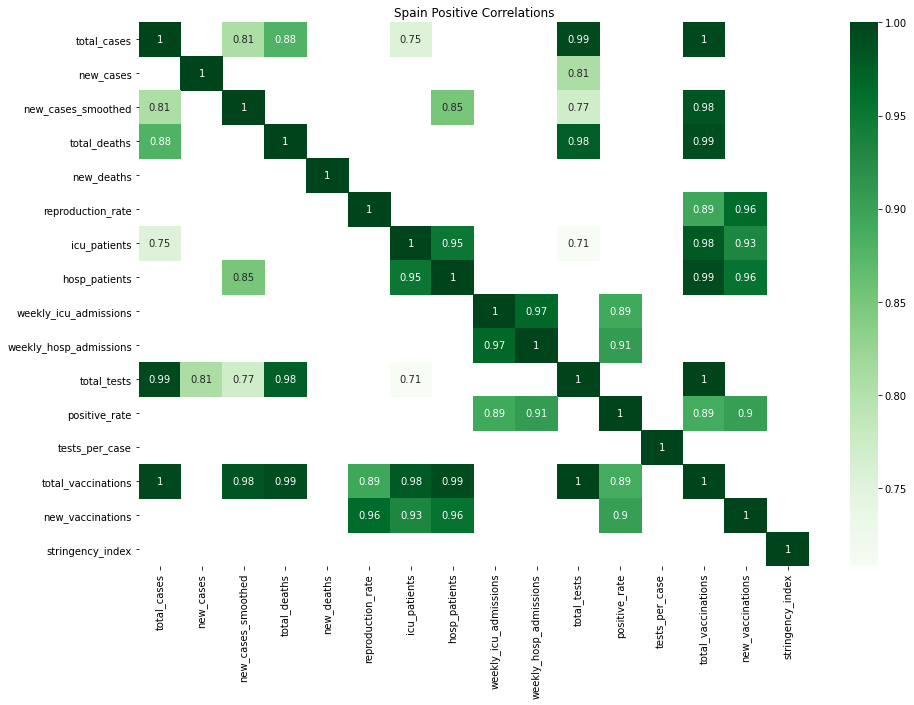

In [76]:
# Positive correlations of Spain

p_esp = df_esp.corr()[df_esp.corr() > 0.7]
p_esp = p_esp.dropna(axis=0, how='all')
p_esp = p_esp.dropna(axis=1, how='all')
plt.figure(figsize=(15, 10))
sns.heatmap(p_esp, cmap='Greens', annot=True)
plt.title('Spain Positive Correlations')

Text(0.5, 1.0, 'Spain Negative Correlations')

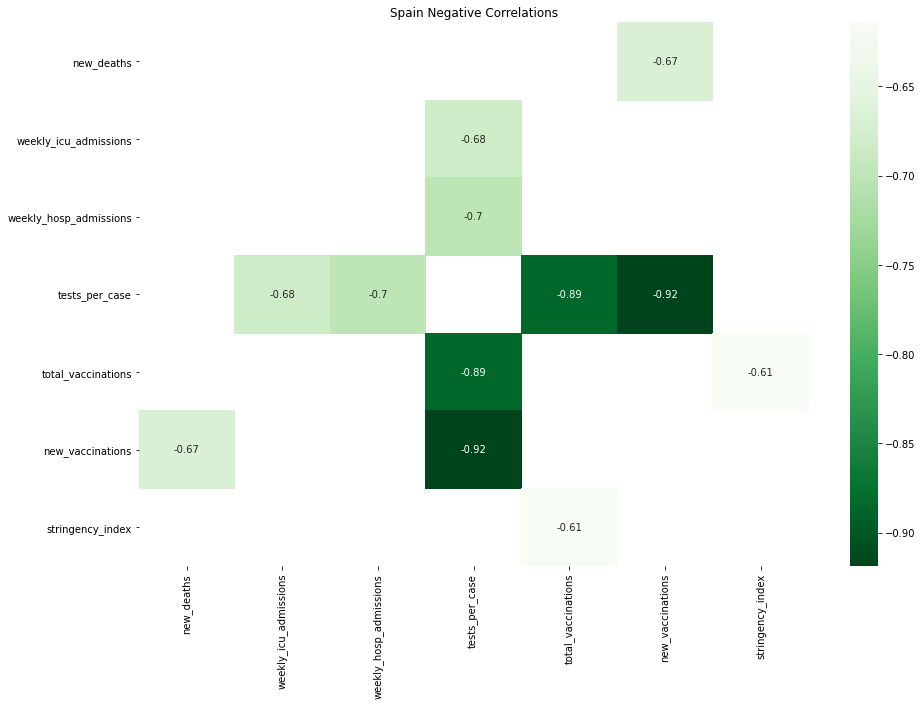

In [77]:
# Negative correlations of Spain


p_esp = df_esp.corr()[df_esp.corr() < -0.6]
p_esp = p_esp.dropna(axis=0, how='all')
p_esp = p_esp.dropna(axis=1, how='all')
plt.figure(figsize=(15, 10))
sns.heatmap(p_esp, cmap=('Greens_r'), annot=True)
plt.title('Spain Negative Correlations')

Text(0.5, 1.0, 'Spain Correlations')

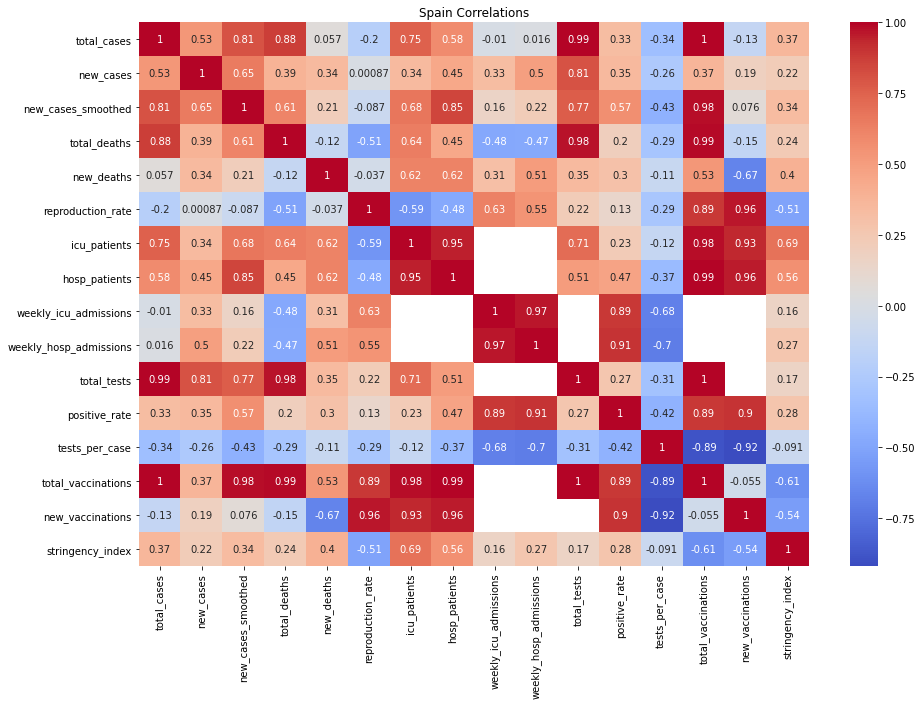

In [78]:
# All relevant correlations of Spain


p_esp = df_esp.corr()
p_esp = p_esp.dropna(axis=0, how='all')
p_esp = p_esp.dropna(axis=1, how='all')
plt.figure(figsize=(15, 10))
sns.heatmap(p_esp, cmap='coolwarm', annot=True)
plt.title('Spain Correlations')

In [14]:
# Positive correlations of Netherlands


p_nth = df_nth.corr()[df_nth.corr() > 0.7]
p_nth = p_nth.dropna(axis=0, how='all')
p_nth = p_nth.dropna(axis=1, how='all')
plt.figure(figsize=(15, 10))
sns.heatmap(p_nth, cmap='Greens', annot=True)
plt.title('Netherlands Positive Correlations')

In [15]:
# Negative correlations of Netherlands


p_nth = df_nth.corr()[df_nth.corr() < -0.6]
p_nth = p_nth.dropna(axis=0, how='all')
p_nth = p_nth.dropna(axis=1, how='all')
plt.figure(figsize=(15, 10))
sns.heatmap(p_nth, cmap='Greens_r', annot=True)
plt.title('Netherlands Negative Correlations')

In [16]:
# All correlations of Netherlands


p_nth = df_nth.corr()
p_nth = p_nth.dropna(axis=0, how='all')
p_nth = p_nth.dropna(axis=1, how='all')
plt.figure(figsize=(15, 10))
sns.heatmap(p_nth, cmap='coolwarm', annot=True)
plt.title('Netherlands Correlations')

In [17]:
# Positive correlations of Mexico


p_mex = df_mex.corr()[df_mex.corr() > 0.7]
p_mex = p_mex.dropna(axis=0, how='all')
p_mex = p_mex.dropna(axis=1, how='all')
plt.figure(figsize=(15, 10))
sns.heatmap(p_mex, cmap='Greens', annot=True)
plt.title('Mexico Positive Correlations')

In [18]:
# Negative correlations of Mexico


p_mex = df_mex.corr()[df_mex.corr() < -0.6]
p_mex = p_mex.dropna(axis=0, how='all')
p_mex = p_mex.dropna(axis=1, how='all')
plt.figure(figsize=(15, 10))
sns.heatmap(p_mex, cmap='Greens_r', annot=True)
plt.title('Mexico Negative Correlations')

In [19]:
# All correlations of Mexico


p_mex = df_mex.corr()
p_mex = p_mex.dropna(axis=0, how='all')
p_mex = p_mex.dropna(axis=1, how='all')
plt.figure(figsize=(15, 10))
sns.heatmap(p_mex, cmap='coolwarm', annot=True)
plt.title('Mexico Correlations')

In [20]:
# Positive correlations of Brazil


p_bra = df_bra.corr()[df_bra.corr() > 0.7]
p_bra = p_bra.dropna(axis=0, how='all')
p_bra = p_bra.dropna(axis=1, how='all')
plt.figure(figsize=(15, 10))
sns.heatmap(p_bra, cmap='Greens', annot=True)
plt.title('Brazil Positive Correlations')

In [21]:
# Negative correlations of Brazil


p_bra = df_bra.corr()[df_bra.corr() < -0.6]
p_bra = p_bra.dropna(axis=0, how='all')
p_bra = p_bra.dropna(axis=1, how='all')
plt.figure(figsize=(15, 10))
sns.heatmap(p_bra, cmap='Greens_r', annot=True)
plt.title('Brazil Negative Correlations')

In [22]:
# All correlations of Brazil


p_bra = df_bra.corr()
p_bra = p_bra.dropna(axis=0, how='all')
p_bra = p_bra.dropna(axis=1, how='all')
plt.figure(figsize=(15, 10))
sns.heatmap(p_bra, cmap='coolwarm', annot=True)
plt.title('Brazil Correlations')

In [23]:
# Positive correlations of Iran


p_irn = df_irn.corr()[df_irn.corr() > 0.7]
p_irn = p_irn.dropna(axis=0, how='all')
p_irn = p_irn.dropna(axis=1, how='all')
plt.figure(figsize=(15, 10))
sns.heatmap(p_irn, cmap='Greens', annot=True)
plt.title('Iran Positive Correlations')

In [24]:
# Negative correlations of Iran


p_irn = df_irn.corr()[df_irn.corr() < -0.6]
p_irn = p_irn.dropna(axis=0, how='all')
p_irn = p_irn.dropna(axis=1, how='all')
plt.figure(figsize=(15, 10))
sns.heatmap(p_irn, cmap='Greens_r', annot=True)
plt.title('Iran Negative Correlations')

In [25]:
# All correlations of Iran


p_irn = df_irn.corr()
p_irn = p_irn.dropna(axis=0, how='all')
p_irn = p_irn.dropna(axis=1, how='all')
plt.figure(figsize=(15, 10))
sns.heatmap(p_irn, cmap='coolwarm', annot=True)
plt.title('Iran Correlations')

## Ranking of the 5 countries

In [26]:
# Total infected, total deaths, life expectancy

In [27]:
df.columns

Index(['iso_code', 'continent', 'location', 'date', 'total_cases', 'new_cases',
       'new_cases_smoothed', 'total_deaths', 'new_deaths',
       'new_deaths_smoothed', 'total_cases_per_million',
       'new_cases_per_million', 'new_cases_smoothed_per_million',
       'total_deaths_per_million', 'new_deaths_per_million',
       'new_deaths_smoothed_per_million', 'reproduction_rate', 'icu_patients',
       'icu_patients_per_million', 'hosp_patients',
       'hosp_patients_per_million', 'weekly_icu_admissions',
       'weekly_icu_admissions_per_million', 'weekly_hosp_admissions',
       'weekly_hosp_admissions_per_million', 'total_tests', 'new_tests',
       'total_tests_per_thousand', 'new_tests_per_thousand',
       'new_tests_smoothed', 'new_tests_smoothed_per_thousand',
       'positive_rate', 'tests_per_case', 'tests_units', 'total_vaccinations',
       'new_vaccinations', 'new_vaccinations_smoothed',
       'total_vaccinations_per_hundred',
       'new_vaccinations_smoothed_per_mil

In [28]:
# Finding the most recent day
rec_date = df['date'].iloc[-1]

In [29]:
# Ranking of the countries according to total cases
ranked_cases = df[df['date'] == rec_date].sort_values('total_cases', ascending=False, ignore_index = True).drop(0)[['location', 'total_cases']].fillna(0)
ranked_cases.index.name = 'Rank'
a = ranked_cases[ranked_cases['location'].isin(countries)]
a

,location,total_cases
Rank,,
3,Brazil,8844577.0
7,Spain,2499560.0
13,Mexico,1763219.0
16,Iran,1372977.0
20,Netherlands,962153.0


Text(0.5, 1.0, 'Total Cases')

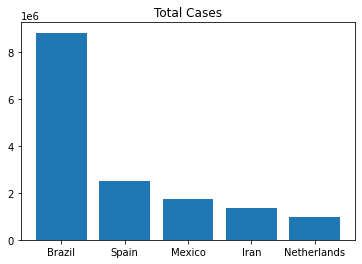

In [30]:
plt.bar(range(len(a)), a['total_cases'])
plt.xticks(range(len(a)), a['location'])
plt.title('Total Cases')

In [31]:
# Ranking of the countries according to total deaths
ranked_deaths = df[df['date'] == rec_date].sort_values('total_deaths', ascending=False, ignore_index = True).drop(0)[['location', 'total_deaths']].fillna(0)
ranked_deaths.index.name = 'Rank'
a = ranked_deaths[ranked_deaths['location'].isin(countries)]
a

,location,total_deaths
Rank,,
2,Brazil,217037.0
4,Mexico,149614.0
9,Iran,57383.0
10,Spain,55441.0
26,Netherlands,13646.0


Text(0.5, 1.0, 'Total deaths')

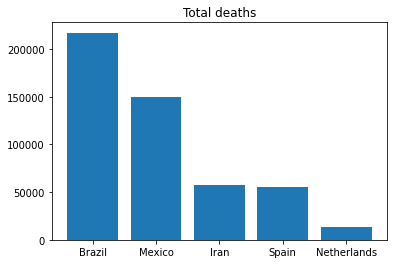

In [32]:
plt.bar(range(len(a)), a['total_deaths'])
plt.xticks(range(len(a)), a['location'])
plt.title('Total deaths')

In [33]:
# Ranking of the countries according to life expectancy
ranked_le = df[df['date'] == rec_date].sort_values('life_expectancy', ascending=False, ignore_index = True)[['location', 'life_expectancy']].fillna(0)
ranked_le.index.name = 'Rank'
a = ranked_le[ranked_le['location'].isin(countries)]
a

,location,life_expectancy
Rank,,
6,Spain,83.56
20,Netherlands,82.28
66,Iran,76.68
74,Brazil,75.88
85,Mexico,75.05


Text(0.5, 1.0, 'Life Expectancy')

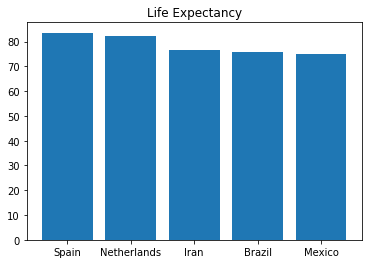

In [34]:
plt.bar(range(len(a)), a['life_expectancy'])
plt.xticks(range(len(a)), a['location'])
plt.title('Life Expectancy')

In [35]:
df[df['date'] == rec_date].sort_values('life_expectancy', ascending=False, ignore_index = True)[['location', 'life_expectancy']]

,location,life_expectancy
0,Monaco,86.75
1,San Marino,84.97
2,Japan,84.63
3,Switzerland,83.78
4,Andorra,83.73
...,...,...
187,Lesotho,54.33
188,Chad,54.24
189,Central African Republic,53.28
190,International,NaN


## Group B json

In [36]:
# Link del grupo b, pero tienen que tener el servidor abierto. Tenemos guardado el json generado el 22 de enero de 2021 para no tener que depender de su servidor
#   http://192.168.0.49:6060/token_id?password=B227766764

Text(0.5, 0, 'Date')

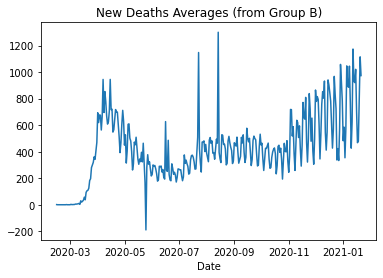

In [37]:
group_b = pd.read_json('group_b_json.json')
plt.plot(group_b)
plt.title('New Deaths Averages (from Group B)')
plt.xlabel('Date')

# Plots

In [38]:
countries = ['Spain', 'Iran', 'Netherlands', 'Mexico', 'Brazil']
df_our_countries = df[df['location'].isin(countries)]

In [39]:
df_our_countries

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index
7577,BRA,South America,Brazil,2020-02-26,1.0,1.0,NaN,NaN,NaN,NaN,...,14103.452,3.4,177.961,8.11,10.1,17.9,NaN,2.20,75.88,0.759
7578,BRA,South America,Brazil,2020-02-27,1.0,0.0,NaN,NaN,NaN,NaN,...,14103.452,3.4,177.961,8.11,10.1,17.9,NaN,2.20,75.88,0.759
7579,BRA,South America,Brazil,2020-02-28,1.0,0.0,NaN,NaN,NaN,NaN,...,14103.452,3.4,177.961,8.11,10.1,17.9,NaN,2.20,75.88,0.759
7580,BRA,South America,Brazil,2020-02-29,2.0,1.0,NaN,NaN,NaN,NaN,...,14103.452,3.4,177.961,8.11,10.1,17.9,NaN,2.20,75.88,0.759
7581,BRA,South America,Brazil,2020-03-01,2.0,0.0,NaN,NaN,NaN,NaN,...,14103.452,3.4,177.961,8.11,10.1,17.9,NaN,2.20,75.88,0.759
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
52329,ESP,Europe,Spain,2021-01-20,2412318.0,41576.0,33747.000,54637.0,464.0,251.286,...,34272.360,1.0,99.403,7.17,27.4,31.4,NaN,2.97,83.56,0.891
52330,ESP,Europe,Spain,2021-01-21,2456675.0,44357.0,34958.286,55041.0,404.0,280.286,...,34272.360,1.0,99.403,7.17,27.4,31.4,NaN,2.97,83.56,0.891
52331,ESP,Europe,Spain,2021-01-22,2499560.0,42885.0,35342.286,55441.0,400.0,303.857,...,34272.360,1.0,99.403,7.17,27.4,31.4,NaN,2.97,83.56,0.891
52332,ESP,Europe,Spain,2021-01-23,2499560.0,0.0,35342.286,55441.0,0.0,303.857,...,34272.360,1.0,99.403,7.17,27.4,31.4,NaN,2.97,83.56,0.891


In [40]:
df.columns

Index(['iso_code', 'continent', 'location', 'date', 'total_cases', 'new_cases',
       'new_cases_smoothed', 'total_deaths', 'new_deaths',
       'new_deaths_smoothed', 'total_cases_per_million',
       'new_cases_per_million', 'new_cases_smoothed_per_million',
       'total_deaths_per_million', 'new_deaths_per_million',
       'new_deaths_smoothed_per_million', 'reproduction_rate', 'icu_patients',
       'icu_patients_per_million', 'hosp_patients',
       'hosp_patients_per_million', 'weekly_icu_admissions',
       'weekly_icu_admissions_per_million', 'weekly_hosp_admissions',
       'weekly_hosp_admissions_per_million', 'total_tests', 'new_tests',
       'total_tests_per_thousand', 'new_tests_per_thousand',
       'new_tests_smoothed', 'new_tests_smoothed_per_thousand',
       'positive_rate', 'tests_per_case', 'tests_units', 'total_vaccinations',
       'new_vaccinations', 'new_vaccinations_smoothed',
       'total_vaccinations_per_hundred',
       'new_vaccinations_smoothed_per_mil

In [41]:
relevant = ['date', 'total_cases', 'new_cases', 'new_cases_smoothed', 'total_deaths', 'new_deaths', 'reproduction_rate', 'icu_patients', 'hosp_patients', 'weekly_icu_admissions', 'weekly_hosp_admissions', 'total_tests', 'new_tests', 'positive_rate', 'tests_per_case', 'tests_units', 'total_vaccinations', 'new_vaccinations', 'stringency_index', 'population', 'median_age']

In [42]:
line_n_c = Plotly_Plot(df=df_our_countries, x_axis= 'date', y_axis= 'new_cases_smoothed', x_label= 'Date', y_label= 'New Cases', title= 'NEW CASES', color= 'location', filename= 'n_c_line').Lineplot()

In [43]:
line_t_c = Plotly_Plot(df=df_our_countries, x_axis= 'date', y_axis= 'total_cases', x_label= 'Date', y_label= 'Total Cases', title= 'TOTAL CASES', color= 'location', filename= 't_c_line').Lineplot()

In [44]:
line_t_d = Plotly_Plot(df=df_our_countries, x_axis= 'date', y_axis= 'total_deaths', x_label= 'Date', y_label= 'Total Deaths', title= 'TOTAL DEATHS', color= 'location', filename= 't_d_line').Lineplot()

In [45]:
line_n_d = Plotly_Plot(df=df_our_countries, x_axis= 'date', y_axis= 'new_deaths_smoothed', x_label= 'Date', y_label= 'New Deaths', title= 'NEW DEATHS', color= 'location', filename= 'n_d_line').Lineplot()

In [47]:
line_t_vax = Plotly_Plot(df=df_our_countries, x_axis= 'date', y_axis= 'total_vaccinations', x_label= 'Date', y_label= 'Total Vaccinations', title= 'TOTAL VACCINATIONS', color= 'location', filename= 't_vax_line').Lineplot()

In [48]:
line_n_vax = Plotly_Plot(df=df_our_countries, x_axis= 'date', y_axis= 'new_vaccinations_smoothed', x_label= 'Date', y_label= 'New Vaccinations', title= 'NEW VACCINATIONS', color= 'location', filename= 'n_vax_line').Lineplot()

In [49]:
line_n_tests = Plotly_Plot(df=df_our_countries, x_axis= 'date', y_axis= 'new_tests_smoothed', x_label= 'Date', y_label= 'New Tests', title= 'NEW TESTS', color= 'location', filename= 'n_tests_line').Lineplot()

In [50]:
# Calculando un Df para meter en Barplot
df_age_bar = df_our_countries.groupby('location').mean()[['median_age']]
df_age_bar['location'] = df_age_bar.index

In [51]:
line_m_age = Plotly_Plot(df= df_age_bar, x_axis= 'location', y_axis= 'median_age', x_label= 'Countries', y_label= 'Age', title= 'MEDIAN AGE', color= 'location', filename= 'm_age_bar').Barplot()

In [52]:
line_p_rate = Plotly_Plot(df=df_our_countries, x_axis= 'date', y_axis= 'positive_rate', x_label= 'Date', y_label= 'Positive Rate', title= 'POSITIVE RATE', color= 'location', filename= 'p_rate_line').Lineplot()

In [53]:
pie_t_c = Plotly_Plot(df=df_our_countries, x_axis= 'date', y_axis= 'total_cases', x_label= 'Date', y_label= 'Total Cases', title= 'TOTAL CASES', color= 'location', filename= 't_c_pie').Piechart()

In [54]:
pie_t_d = Plotly_Plot(df=df_our_countries, x_axis= 'date', y_axis= 'total_deaths', x_label= 'Date', y_label= 'Total Deaths', title= 'TOTAL DEATHS', color= 'location', filename= 't_d_pie').Piechart()

In [58]:
box_n_c = Plotly_Plot(df=df_our_countries, x_axis= 'location', y_axis= 'new_cases_smoothed', x_label= 'Country', y_label= 'New Cases', title= 'NEW CASES', color= 'location', filename= 'n_c_box').Boxplot()

In [59]:
box_n_d = Plotly_Plot(df=df_our_countries, x_axis= 'location', y_axis= 'new_cases_smoothed', x_label= 'Country', y_label= 'New Deaths', title= 'NEW DEATHS', color= 'location', filename= 'n_d_box').Boxplot()

In [61]:
group_b['date'] = group_b.index

In [69]:
group_b_scat = Plotly_Plot(df=group_b, x_axis= 'date', y_axis= 'n_d_averages', x_label= 'Date', y_label= 'New Deaths Average', title= 'NEW DEATHS AVERAGES GROUP B', color= None, filename= 'group_b_scat').Scatterplot()

In [70]:
group_b_line = Plotly_Plot(df=group_b, x_axis= 'date', y_axis= 'n_d_averages', x_label= 'Date', y_label= 'New Deaths Average', title= 'NEW DEATHS AVERAGES GROUP B', color= None, filename= 'group_b_line').Lineplot()

In [74]:
total_death_pie= px.pie(df_our_countries, names='location', values='total_deaths', title='TOTAL DEATHS').write_html('/Users/alfonsogarcia/Documents/Bootcamp_Data_Science/Git-Student/Group_EDA/group_eda/documentation/html/tot_d_pie.html')

In [75]:
total_cases_pie= px.pie(df_our_countries, names='location', values='total_cases', title='TOTAL CASES').write_html('/Users/alfonsogarcia/Documents/Bootcamp_Data_Science/Git-Student/Group_EDA/group_eda/documentation/html/tot_c_pie.html')